<a href="https://colab.research.google.com/github/liviacelita1/An-lise-de-Leads/blob/main/An%C3%A1lise_de_Lead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

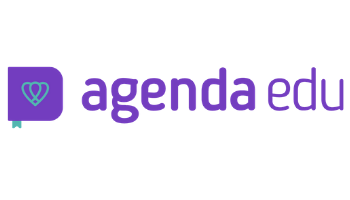

### **DADOS EDUCACIONAIS**

O objetivo da análise mostrada abaixo é, utilizando como ferramenta a econometria por meio da regressão logística, quais são os tipos de variáveis mais importantes para se considerar ao escolher focar em um lead dentro de uma campanha de marketing.

A empresa analisada é a *AgendaEdu*, que está buscando expandir o público alvo que utiliza seu produto: um aplicativo que conecta pais ou responsáveis e instituições de ensino e que dispõe também de ferramentas multicanais que possuem por função armazenar informações sobre o aluno, além de ser um sistema de geração de conteúdos educacionais direcionados.

O estudo de expansão de mercado foi feito direcionando os estudos para a Índia, que é um país em desenvolvimento, se assemelhando em alguns aspectos socioeconômicos a realidade brasileira, todavia, com a disponibilidade de uma população maior.


Os dados utilizados neste notebook foram encontrados dentro do Kaggle, no seguinte endereço: https://www.kaggle.com/datasets/lakshmikalyan/lead-scoring-x-online-education

Todavia, era necessário que se fizesse uma limpeza dos dados presentes do dataset. O processo foi feito utilizando o Microsoft Power BI, por meio do PowerQuery, onde foi feita não apenas a filtragem, mas o processo de renomear as colunas presentes.

Logo após este processo, utilizei o VS Code para fazer a manipulação dos dados utilizados, todavia, é necessário esclarecer que, por escolha pessoal, optei por trazê-los para o Colab, que é um ambiente mais amigável em termos de download de arquivos e compartilhamento com ooutros pessoas, ao meu ver.

In [ ]:
#importando as bibliotecas iniciais
import pandas as pd
import numpy as np

In [ ]:
pip install pandas openpyxl

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving leads.xlsx to leads.xlsx


In [ ]:
#visualizando os dados
dados = pd.read_excel('leads.xlsx')
dados




,Número do Lead,Converteu,TotalDeVisitas,TempoNoSite(minutos),PáginasPorVisita,Pontuação de atividade assimetrica,Pontuação do perfil assimetrico
0,660727,1,2,1532,2,14,20
1,660719,0,1,305,1,13,17
2,660681,1,2,1428,1,15,18
3,660673,1,2,1640,2,14,20
4,660608,1,8,1351,8,15,14
...,...,...,...,...,...,...,...
995,628542,0,2,547,1,11,15
996,628536,1,4,1602,133,14,16
997,628482,1,1,1054,1,14,19
998,628347,1,24,1500,2,16,18


In [ ]:
# Definindo a função logística
def logistica(x):
    return 1 / (1 + np.exp(-x))

# Iterando sobre as colunas e calculando o logit para cada uma delas
for coluna in dados.columns:
    if pd.api.types.is_numeric_dtype(dados[coluna]):
        dados[f'{coluna}_logit'] = logistica(dados[coluna])

#exibindo os dados
print(dados)

     Número do Lead  Converteu  TotalDeVisitas  TempoNoSite(minutos)  \
0            660727          1               2                  1532   
1            660719          0               1                   305   
2            660681          1               2                  1428   
3            660673          1               2                  1640   
4            660608          1               8                  1351   
..              ...        ...             ...                   ...   
995          628542          0               2                   547   
996          628536          1               4                  1602   
997          628482          1               1                  1054   
998          628347          1              24                  1500   
999          628164          1               6                  1168   

     PáginasPorVisita  Pontuação de atividade assimetrica  \
0                   2                                  14   
1            

In [ ]:
output_excel = 'dados_novos_com_logit.xlsx'

# Salvando o DataFrame atualizado em um arquivo Excel
dados.to_excel(output_excel, index=False)

print(f"DataFrame com logit salvo em '{output_excel}'")

DataFrame com logit salvo em 'dados_novos_com_logit.xlsx'


In [ ]:
def download_dataframe_excel(dataframe, filename):
    """
    Função para baixar um DataFrame como um arquivo Excel.

    Parâmetros:
        dataframe (pandas.DataFrame): O DataFrame a ser salvo.
        filename (str): O nome do arquivo Excel de saída.

    Retorna:
        None
    """
    # Salvando o DataFrame como um arquivo Excel
    dataframe.to_excel(filename, index=False)

    # Imprimindo a mensagem de confirmação
    print(f"DataFrame salvo como '{filename}'. Faça o download do arquivo.")
download_dataframe_excel(dados, 'dados_novos_com_logit.xlsx')

DataFrame salvo como 'dados_novos_com_logit.xlsx'. Faça o download do arquivo.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dados Educação Filtrados.xlsx to Dados Educação Filtrados.xlsx


In [ ]:
dados_gerais = pd.read_excel('Dados Educação Filtrados.xlsx')
dados_gerais

,Id do Prospecto,Número do Lead,Origem do Lead,Busca do Lead,Contato por E-mail,Fez Ligação,Converteu,TotalDeVisitas,TempoNoSite(minutos),PáginasPorVisita,...,Receber novidades sobre nossos servicos,Tags,Qualidade do Lead,Me mande novidade por DM,Perfil do Lead,índice de atividade assimetrica,Índice de perfil assimetrico,Pontuação de atividade assimetrica,Pontuação do perfil assimetrico,ÚltimaAtividade
0,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,...,No,Will revert after reading the email,Might be,No,Potential Lead,02.Medium,01.High,14,20,Email Opened
1,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,...,No,Ringing,Not Sure,No,Select,02.Medium,01.High,13,17,Modified
2,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2,1428,1,...,No,Will revert after reading the email,Might be,No,Select,02.Medium,01.High,15,18,Modified
3,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2,1640,2,...,No,Will revert after reading the email,Low in Relevance,No,Potential Lead,02.Medium,01.High,14,20,Modified
4,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8,1351,8,...,No,Will revert after reading the email,Might be,No,Select,02.Medium,02.Medium,15,14,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5a31d54e-2caf-41ca-8050-f6313a876d45,628542,API,Google,No,No,0,2,547,1,...,No,Interested in other courses,High in Relevance,No,Other Leads,03.Low,02.Medium,11,15,Modified
996,04d42c22-824b-4b42-80f6-0fe998b3e688,628536,Landing Page Submission,Direct Traffic,No,No,1,4,1602,133,...,No,Lost to EINS,Worst,No,Select,02.Medium,02.Medium,14,16,Modified
997,551f8c98-65cd-46f3-ae1f-77eef6fe9834,628482,Lead Add Form,Reference,No,No,1,1,1054,1,...,No,Closed by Horizzon,High in Relevance,No,Select,02.Medium,01.High,14,19,Email Opened
998,c855c471-0572-4f86-a450-eb78a55f2f1d,628347,Landing Page Submission,Direct Traffic,No,No,1,24,1500,2,...,No,Will revert after reading the email,Might be,No,Select,01.High,01.High,16,18,Page Visited on Website


In [ ]:
dados_gerais ['Qualidade do Lead']
dados_gerais ['Qualidade do Lead'].unique()

array(['Might be', 'Not Sure', 'Low in Relevance', 'Worst',
       'High in Relevance'], dtype=object)

In [ ]:
sorted(dados_gerais['Qualidade do Lead'].unique())

['High in Relevance', 'Low in Relevance', 'Might be', 'Not Sure', 'Worst']

In [ ]:
dados_gerais['Qualidade do Lead'].value_counts()

Qualidade do Lead
Might be             399
Not Sure             279
Low in Relevance     160
High in Relevance    106
Worst                 56
Name: count, dtype: int64

In [ ]:
dados_gerais ['Qualidade do Lead'].value_counts(normalize = True) * 100

Qualidade do Lead
Might be             39.9
Not Sure             27.9
Low in Relevance     16.0
High in Relevance    10.6
Worst                 5.6
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

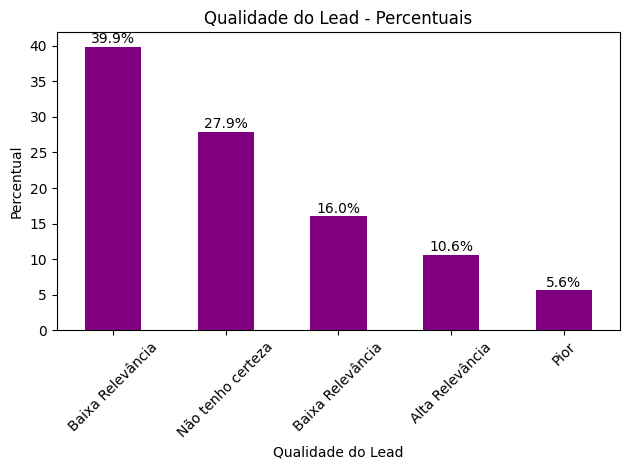

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados fornecidos
qualidade_data = {
    'Qualidade do Lead': ['Baixa Relevância', 'Não tenho certeza', 'Baixa Relevância', 'Alta Relevância', 'Pior'],
    'Percentual': [39.9, 27.9, 16.0, 10.6, 5.6]
}
df_qualidade = pd.DataFrame(qualidade_data)

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))

ax = df_qualidade.plot(kind='bar', x='Qualidade do Lead', y='Percentual', color='purple', legend=None)

# Adicionando os percentuais acima de cada barra
for i, v in enumerate(df_qualidade['Percentual']):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.title('Qualidade do Lead - Percentuais')
plt.ylabel('Percentual')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
dados_gerais ['Busca do Lead']
dados_gerais ['Busca do Lead'].unique()

array(['Direct Traffic', 'Google', 'Organic Search', 'Referral Sites',
       'Olark Chat', 'Social Media', 'Reference', 'WeLearn'], dtype=object)

In [ ]:
dados_gerais ['Origem do Lead']
dados_gerais ['Origem do Lead'].unique()

array(['Landing Page Submission', 'API', 'Lead Add Form'], dtype=object)

In [ ]:
dados_gerais ['UltimaAtividade']
dados_gerais ['UltimaAtividade'].unique()

array(['Email Opened', 'Unreachable', 'Converted to Lead',
       'Email Link Clicked', 'Page Visited on Website',
       'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'Email Bounced',
       'Olark Chat Conversation', 'SMS Sent',
       'Visited Booth in Tradeshow'], dtype=object)

In [ ]:
sorted(dados_gerais['UltimaAtividade'].unique())

['Converted to Lead',
 'Email Bounced',
 'Email Link Clicked',
 'Email Opened',
 'Form Submitted on Website',
 'Had a Phone Conversation',
 'Olark Chat Conversation',
 'Page Visited on Website',
 'SMS Sent',
 'Unreachable',
 'Unsubscribed',
 'Visited Booth in Tradeshow']

In [ ]:
dados_gerais['UltimaAtividade'].value_counts()

UltimaAtividade
Email Opened                  450
SMS Sent                      258
Page Visited on Website        76
Converted to Lead              58
Unreachable                    40
Olark Chat Conversation        34
Email Link Clicked             30
Form Submitted on Website      19
Email Bounced                  18
Had a Phone Conversation       10
Unsubscribed                    6
Visited Booth in Tradeshow      1
Name: count, dtype: int64

In [ ]:
dados_gerais ['UltimaAtividade'].value_counts(normalize = True) * 100

UltimaAtividade
Email Opened                  45.0
SMS Sent                      25.8
Page Visited on Website        7.6
Converted to Lead              5.8
Unreachable                    4.0
Olark Chat Conversation        3.4
Email Link Clicked             3.0
Form Submitted on Website      1.9
Email Bounced                  1.8
Had a Phone Conversation       1.0
Unsubscribed                   0.6
Visited Booth in Tradeshow     0.1
Name: proportion, dtype: float64

<Figure size 1000x600 with 0 Axes>

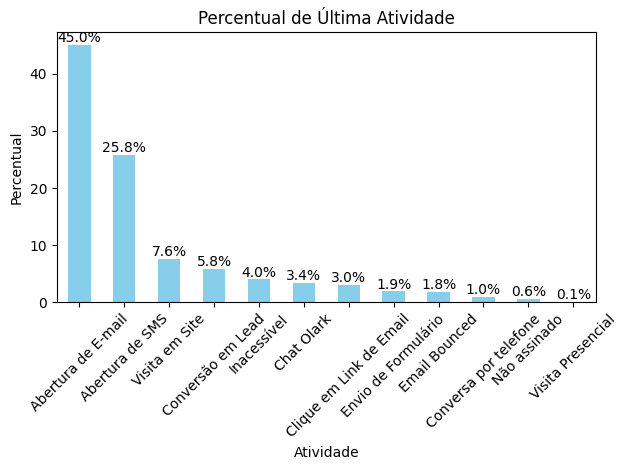

In [ ]:

# Dados sobre a última atividade
ultima_atividade_data = {
    'Atividade': ['Abertura de E-mail', 'Abertura de SMS', 'Visita em Site', 'Conversão em Lead',
                  'Inacessível', 'Chat Olark', 'Clique em Link de Email',
                  'Envio de Formulário', 'Email Bounced', 'Conversa por telefone',
                  'Não assinado', 'Visita Presencial'],
    'Percentual': [45.0, 25.8, 7.6, 5.8, 4.0, 3.4, 3.0, 1.9, 1.8, 1.0, 0.6, 0.1]
}
df_ultima_atividade = pd.DataFrame(ultima_atividade_data)

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))

ax = df_ultima_atividade.plot(kind='bar', x='Atividade', y='Percentual', color='skyblue', legend=None)

# Adicionando os percentuais acima de cada barra
for i, v in enumerate(df_ultima_atividade['Percentual']):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center')

plt.title('Percentual de Última Atividade')
plt.ylabel('Percentual')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(False)  # Remove as linhas de grade
plt.tight_layout()
plt.show()


In [ ]:
dados_gerais ['Onde você leu sobre o AgendaEdu?']
dados_gerais ['Onde você leu sobre o AgendaEdu?'].unique()

array(['Select', 'Word Of Mouth', 'Other', 'Online Search',
       'Advertisements', 'Student of SomeSchool', 'Email',
       'Multiple Sources', 'Social Media', 'SMS'], dtype=object)

In [ ]:
sorted(dados_gerais['Onde você leu sobre o AgendaEdu?'].unique())

['Advertisements',
 'Email',
 'Multiple Sources',
 'Online Search',
 'Other',
 'SMS',
 'Select',
 'Social Media',
 'Student of SomeSchool',
 'Word Of Mouth']

In [ ]:
dados_gerais['Onde você leu sobre o AgendaEdu?'].value_counts()

Onde você leu sobre o AgendaEdu?
Select                   619
Online Search            147
Word Of Mouth             62
Student of SomeSchool     55
Other                     43
Multiple Sources          36
Social Media              17
Advertisements            13
Email                      6
SMS                        2
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

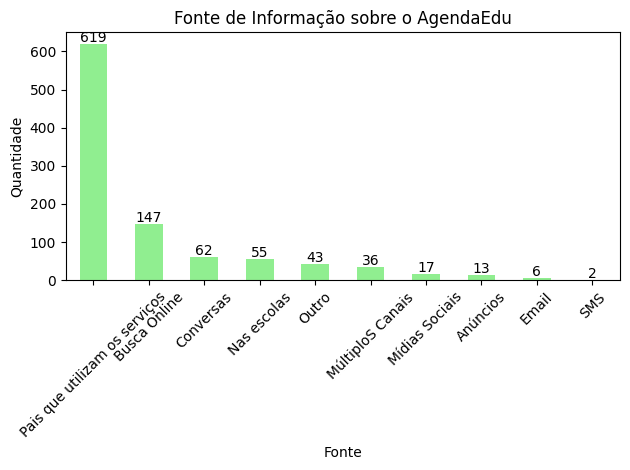

In [ ]:
# Dados sobre a fonte de leitura sobre o AgendaEdu
fonte_leitura_data = {
    'Fonte': ['Pais que utilizam os serviços', 'Busca Online', 'Conversas', 'Nas escolas',
              'Outro', 'MúltiploS Canais', 'Mídias Sociais', 'Anúncios',
              'Email', 'SMS'],
    'Quantidade': [619, 147, 62, 55, 43, 36, 17, 13, 6, 2]
}
df_fonte_leitura = pd.DataFrame(fonte_leitura_data)

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))

ax = df_fonte_leitura.plot(kind='bar', x='Fonte', y='Quantidade', color='lightgreen', legend=None)

# Adicionando as quantidades acima de cada barra
for i, v in enumerate(df_fonte_leitura['Quantidade']):
    ax.text(i, v + 5, str(v), ha='center')

plt.title('Fonte de Informação sobre o AgendaEdu')
plt.ylabel('Quantidade')
plt.xlabel('Fonte')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(False)  # Remove as linhas de grade
plt.tight_layout()
plt.show()

